0901 슬라이드

In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

# 데이터 수집과 그룹 연산

## 이 장에서 다룰 내용

- 하나 이상의 키 (함수, 배열, DataFrame의 칼럼 이름)을 이용해서 pandas 객체를 여러 조각으로 나누는 방법
- 합계, 평균, 표준편차, 사용자 정의 함수 같은 그룹 요약통계를 계산하는 방법
- DataFrame의 각 칼럼에 다양한 함수를 적용하는 방법
- 정규화, 선형 회귀, 등급 또는 부분집합 선택 같은 집단 내 변형이나 다른 조작을 적용하는 방법
- 피벗 테이블과 교차일람표를 구하는 방법
- 변위치 분석과 다른 데이터 파생 집단 분석을 수행하는 방법

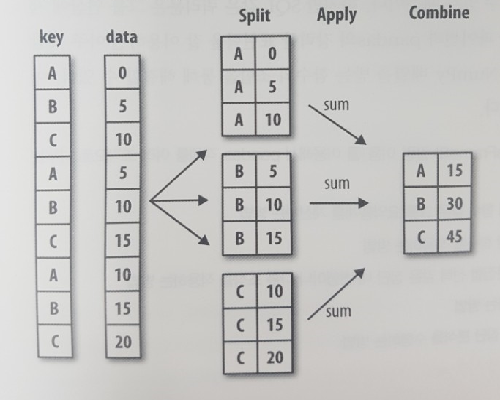

split, apply, combine이 한꺼번에 수행되는게 groupby

## 그룹의 색인은 아래와 같이 다양한 형태가 될 수 있다.

- 그룹으로 묶을 축과 같은 길이의 리스트나 배열
- DataFrame의 칼럼 이름을 지칭하는 값
- 그룹으로 묶을 값과 그룹 이름에 대응하는 사전이나 Series 객체
- 축 색인 혹은 색인 내의 개별 이름에 대해 실행되는 함수

아래의 DataFrame 객체 df를 'key1'을 기준으로 묶고 각 그룹에서 'data1'의 평균을 구하라.

In [9]:
df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                'key2' : ['one', 'two', 'one', 'two', 'one'],
                'data1' : np.random.randn(5),
                'data2' : np.random.randn(5)})

In [10]:
display(df)
grouped = df['data1'].groupby(df['key1'])
grouped

,data1,data2,key1,key2
0,-0.128528,1.638728,a,one
1,-2.095230,1.096658,a,two
2,-0.482609,0.149495,b,one
3,-0.208121,2.234261,b,two
4,-0.567961,-0.014386,a,one


- grouped는 GroupBy 객체이다. df['key1']로 참조되는 중간 값에 대한 것 외에 아무것도 계산되지 않는 객체이다.
- 이 객체는 그룹 연산을 위해 필요한 모든 정보를 갖고 있기 때문에 각 그룹에 어떤 연산을 적용할 수 있게 해준다.
- 예를 들어, 아래와 같이 그룹별 평균을 구할 수 있다.

In [5]:
display(df)
grouped.mean()

,data1,data2,key1,key2
0,-0.724246,-0.833185,a,one
1,0.866761,0.386942,a,two
2,0.744802,-0.299055,b,one
3,-1.179613,-0.904172,b,two
4,-0.116545,-1.501803,a,one


key1
a    0.008657
b   -0.217405
Name: data1, dtype: float64

a : 0,1,4행의 평균, b:2,3행의 평균

'key1'과 'key2'에 대하여 groupby 연산을 수행하면 계층적 색인을 가지는 Series 객체를 얻을 수 있다.

In [13]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one    -0.348245
      two    -2.095230
b     one    -0.482609
      two    -0.208121
Name: data1, dtype: float64

In [15]:
DataFrame(means)

data1
key1 key2          
a    one  -0.348245
     two  -2.095230
b    one  -0.482609
     two  -0.208121

In [8]:
means.unstack()

key2,one,two
key1,,
a,-0.420395,0.866761
b,0.744802,-1.179613


In [18]:
sum= df['data1'].groupby([df['key1'], df['key2']]).sum()
sum

key1  key2
a     one    -0.696489
      two    -2.095230
b     one    -0.482609
      two    -0.208121
Name: data1, dtype: float64

In [ ]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

In [19]:
df['data1']

0   -0.128528
1   -2.095230
2   -0.482609
3   -0.208121
4   -0.567961
Name: data1, dtype: float64

In [20]:
df

,data1,data2,key1,key2
0,-0.128528,1.638728,a,one
1,-2.095230,1.096658,a,two
2,-0.482609,0.149495,b,one
3,-0.208121,2.234261,b,two
4,-0.567961,-0.014386,a,one


groupby의 색인은 길이만 같다면 어떠한 배열도 가능하다.

In [21]:
display(df)
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

,data1,data2,key1,key2
0,-0.128528,1.638728,a,one
1,-2.095230,1.096658,a,two
2,-0.482609,0.149495,b,one
3,-0.208121,2.234261,b,two
4,-0.567961,-0.014386,a,one


California  2005   -2.095230
            2006   -0.482609
Ohio        2005   -0.168325
            2006   -0.567961
Name: data1, dtype: float64

일반적으로는 같은 DataFrame 객체 안의 열 이름(문자열, 숫자 혹은 다른 파이썬 객체)을 넘겨서 그룹의 색인으로 사용할 수 있다.

In [22]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,-0.930573,0.907000
b,-0.345365,1.191878


key2는 문자열이기 때문에 평균을 수행 할 수 없어서 자동으로 빠짐

'key2'는 문자열이므로 mean 메소드를 실행할 때 자동으로 빠졌다. 'key1'과 'key2'를 색인으로 지정할 수도 있다.

In [23]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one  -0.348245  0.812171
     two  -2.095230  1.096658
b    one  -0.482609  0.149495
     two  -0.208121  2.234261

GroupBy 객체의 인스턴스 메소드인 size를 이용해 각 그룹별 크기를 알 수 있다.

In [24]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

## 그룹 간 순회하기
GroupBy 객체는 이터레이션을 지원하는데, 그룹 이름과 그에 따른 데이터 묶음을 튜플로 반환한다.

In [30]:
display(df)

,data1,data2,key1,key2
0,-0.128528,1.638728,a,one
1,-2.095230,1.096658,a,two
2,-0.482609,0.149495,b,one
3,-0.208121,2.234261,b,two
4,-0.567961,-0.014386,a,one


In [33]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,-0.930573,0.907000
b,-0.345365,1.191878


연산을 수행하면 key1가 key2가 빠진 것처럼 보이지만 실제로는 안빠지고 살아있음

In [ ]:
for name, group in df.groupby('key1'):
    print (name);print(group)

In [31]:
for name, group in df.groupby('key1'):
    print (name);print(group)

a
      data1     data2 key1 key2
0 -0.128528  1.638728    a  one
1 -2.095230  1.096658    a  two
4 -0.567961 -0.014386    a  one
b
      data1     data2 key1 key2
2 -0.482609  0.149495    b  one
3 -0.208121  2.234261    b  two


In [34]:
display(df)
for name, group in df.groupby('key2'):
    print(name)
    print(group)

,data1,data2,key1,key2
0,-0.128528,1.638728,a,one
1,-2.095230,1.096658,a,two
2,-0.482609,0.149495,b,one
3,-0.208121,2.234261,b,two
4,-0.567961,-0.014386,a,one


one
      data1     data2 key1 key2
0 -0.128528  1.638728    a  one
2 -0.482609  0.149495    b  one
4 -0.567961 -0.014386    a  one
two
      data1     data2 key1 key2
1 -2.095230  1.096658    a  two
3 -0.208121  2.234261    b  two


첫 번째 요소가 색인 값이 된다.

In [26]:
display(df)
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

,data1,data2,key1,key2
0,-0.128528,1.638728,a,one
1,-2.095230,1.096658,a,two
2,-0.482609,0.149495,b,one
3,-0.208121,2.234261,b,two
4,-0.567961,-0.014386,a,one


('a', 'one')
      data1     data2 key1 key2
0 -0.128528  1.638728    a  one
4 -0.567961 -0.014386    a  one
('a', 'two')
     data1     data2 key1 key2
1 -2.09523  1.096658    a  two
('b', 'one')
      data1     data2 key1 key2
2 -0.482609  0.149495    b  one
('b', 'two')
      data1     data2 key1 key2
3 -0.208121  2.234261    b  two


아래와 같이 GroupBy 객체를 사전 객체로 변환하여 사용할 수 있다.

In [29]:
list(df.groupby('key1'))

[('a',       data1     data2 key1 key2
  0 -0.128528  1.638728    a  one
  1 -2.095230  1.096658    a  two
  4 -0.567961 -0.014386    a  one), ('b',       data1     data2 key1 key2
  2 -0.482609  0.149495    b  one
  3 -0.208121  2.234261    b  two)]

In [27]:
display(df)
pieces = dict(list(df.groupby('key1')))
pieces['b']

,data1,data2,key1,key2
0,-0.128528,1.638728,a,one
1,-2.095230,1.096658,a,two
2,-0.482609,0.149495,b,one
3,-0.208121,2.234261,b,two
4,-0.567961,-0.014386,a,one


,data1,data2,key1,key2
2,-0.482609,0.149495,b,one
3,-0.208121,2.234261,b,two


groupby 메소드는 기본적으로 axis=0에 대해 그룹을 만드는데, axis=1로 지정하여 열 별로 그룹을 묶는 것도 가능하다.

아래는 df의 데이터 타입을 기준으로 열 별로 그룹을 묶는 예이다.

In [35]:
display(df)
df.dtypes

,data1,data2,key1,key2
0,-0.128528,1.638728,a,one
1,-2.095230,1.096658,a,two
2,-0.482609,0.149495,b,one
3,-0.208121,2.234261,b,two
4,-0.567961,-0.014386,a,one


data1    float64
data2    float64
key1      object
key2      object
dtype: object

In [36]:
display(df)
grouped = df.groupby(df.dtypes, axis=1)
dict(list(grouped))

,data1,data2,key1,key2
0,-0.128528,1.638728,a,one
1,-2.095230,1.096658,a,two
2,-0.482609,0.149495,b,one
3,-0.208121,2.234261,b,two
4,-0.567961,-0.014386,a,one


{dtype('float64'):       data1     data2
 0 -0.128528  1.638728
 1 -2.095230  1.096658
 2 -0.482609  0.149495
 3 -0.208121  2.234261
 4 -0.567961 -0.014386, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

# 칼럼 또는 칼럼의 일부만 선택하기
DataFrame에서 만든 GroupBy 객체를 칼럼 이름이나 칼럼 이름이 담긴 배열로 색인하면 수집을 위해 해당 칼럼을 선택하게 된다.

In [37]:
display(df)
df.groupby('key1')['data1']

,data1,data2,key1,key2
0,-0.128528,1.638728,a,one
1,-2.095230,1.096658,a,two
2,-0.482609,0.149495,b,one
3,-0.208121,2.234261,b,two
4,-0.567961,-0.014386,a,one


In [39]:
df['data1']

0   -0.128528
1   -2.095230
2   -0.482609
3   -0.208121
4   -0.567961
Name: data1, dtype: float64

In [38]:
df['data1'].groupby(df['key1'])

[]을하면 색인이 되서 차원이 낮아지는데 [[]]을 하면 팬시색인으로 차원 유지

In [44]:
df.groupby('key1')[['data2']]

In [45]:
df[['data2']].groupby(df['key1'])

'data2' 열에 대해서만 평균을 구하고 결과를 DataFrame으로 받고 싶다면 다음과 같이 작성한다. (팬시색인이 되므로 차원이 축소되지 않는다.)

In [46]:
display(df)
df.groupby(['key1', 'key2'])[['data2']].mean()

,data1,data2,key1,key2
0,-0.128528,1.638728,a,one
1,-2.095230,1.096658,a,two
2,-0.482609,0.149495,b,one
3,-0.208121,2.234261,b,two
4,-0.567961,-0.014386,a,one


data2
key1 key2          
a    one   0.812171
     two   1.096658
b    one   0.149495
     two   2.234261

열 이름으로 색인을 한 경우에는 차원이 축소된다.

In [47]:
df.groupby(['key1', 'key2'])['data2'].mean()

key1  key2
a     one     0.812171
      two     1.096658
b     one     0.149495
      two     2.234261
Name: data2, dtype: float64

In [48]:
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped

In [49]:
s_grouped.mean()

key1  key2
a     one     0.812171
      two     1.096658
b     one     0.149495
      two     2.234261
Name: data2, dtype: float64

## 사전과 Series로 묶기
DataFrame 객체인 people을 만들고 'Wes' 행의 'b'와 'c' 열을 NA로 채운다.

In [50]:
people = DataFrame(np.random.randn(5, 5),
                   columns=['a', 'b', 'c', 'd', 'e'],
                   index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
display(people)
people.loc['Wes',['b', 'c']] = np.nan
display(people)

,a,b,c,d,e
Joe,0.526306,1.072388,0.075162,0.045799,-0.411269
Steve,0.095996,0.364649,-0.273940,-0.099969,0.732514
Wes,1.171703,0.190132,0.283540,0.429925,-2.727854
Jim,0.199527,-0.412536,-1.175057,-0.878857,-1.145094
Travis,2.145047,1.556619,-0.884750,-0.476682,0.917639


,a,b,c,d,e
Joe,0.526306,1.072388,0.075162,0.045799,-0.411269
Steve,0.095996,0.364649,-0.273940,-0.099969,0.732514
Wes,1.171703,NaN,NaN,0.429925,-2.727854
Jim,0.199527,-0.412536,-1.175057,-0.878857,-1.145094
Travis,2.145047,1.556619,-0.884750,-0.476682,0.917639


컬럼 별로 'red', 'blue', 'orange'로 매핑하는 사전객체 mapping을 준비하여 이를 기준으로 묶는다.

In [52]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [53]:
mapping

{'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f': 'orange'}

cd가 blue여서 sum하면 합쳐짐

In [54]:
by_column = people.groupby(mapping, axis=1)
by_column.sum()

,blue,red
Joe,0.120962,1.187424
Steve,-0.373909,1.193159
Wes,0.429925,-1.556152
Jim,-2.053914,-1.358103
Travis,-1.361432,4.619305


Series 객체를 기준으로 groupby를 수행하려면 Series 객체의 색인이 그루핑하려는 객체의 색인과 맞아떨어지는지 확인해야 한다.

In [55]:
map_series = Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

누락 값이 포함된 'Wes' 행은 count에서 빠진 것을 알 수 있다.

In [56]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


## 함수로 묶기
그룹 색인으로 넘긴 함수는 색인 값 하나마다 한 번씩 호출되며, 반환 값은 그 그룹의 이름으로 사용된다.

DataFrame 객체인 people의 행 인덱스의 길이를 반환하는 len 함수를 이용해 groupby를 수행해보자.

len=3은 Joe Wes JJim

In [58]:
display(people)
people.groupby(len).sum()

,a,b,c,d,e
Joe,0.526306,1.072388,0.075162,0.045799,-0.411269
Steve,0.095996,0.364649,-0.273940,-0.099969,0.732514
Wes,1.171703,NaN,NaN,0.429925,-2.727854
Jim,0.199527,-0.412536,-1.175057,-0.878857,-1.145094
Travis,2.145047,1.556619,-0.884750,-0.476682,0.917639


,a,b,c,d,e
3,1.897536,0.659851,-1.099895,-0.403133,-4.284218
5,0.095996,0.364649,-0.273940,-0.099969,0.732514
6,2.145047,1.556619,-0.884750,-0.476682,0.917639


함수와 배열, 사전 또는 Series를 함께 섞어서 groupby를 수행할 수도 있다.

In [59]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one  0.526306  1.072388  0.075162  0.045799 -2.727854
  two  0.199527 -0.412536 -1.175057 -0.878857 -1.145094
5 one  0.095996  0.364649 -0.273940 -0.099969  0.732514
6 two  2.145047  1.556619 -0.884750 -0.476682  0.917639

In [60]:
df=pd.read_csv('titanic.csv')

In [61]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [72]:
df.groupby(['Pclass','Survived'])[['Survived']].count()

Survived
Pclass Survived          
1      0               80
       1              136
2      0               97
       1               87
3      0              372
       1              119

생존률 구하기

In [95]:
df.groupby(['Pclass','Survived'])[['Survived']].count()

Survived
Pclass Survived          
1      0               80
       1              136
2      0               97
       1               87
3      0              372
       1              119

In [89]:
df.groupby('Pclass')[['Survived']].sum()

,Survived
Pclass,
1,136
2,87
3,119


agerange ~15], 16~60], 61~

In [78]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [80]:
df['Age']=df['Age'].astype('int')

In [81]:
agerange=(0,15,60,100)

In [83]:
df['AgeRange']=pd.cut(df['Age'],agerange)

In [84]:
df['AgeRange']

0      (15, 60]
1      (15, 60]
2      (15, 60]
3      (15, 60]
4      (15, 60]
5      (15, 60]
6      (15, 60]
7       (0, 15]
8      (15, 60]
9       (0, 15]
10      (0, 15]
11     (15, 60]
12     (15, 60]
13     (15, 60]
14      (0, 15]
15     (15, 60]
16      (0, 15]
17     (15, 60]
18     (15, 60]
19     (15, 60]
20     (15, 60]
21     (15, 60]
22      (0, 15]
23     (15, 60]
24      (0, 15]
25     (15, 60]
26     (15, 60]
27     (15, 60]
28     (15, 60]
29     (15, 60]
         ...   
861    (15, 60]
862    (15, 60]
863    (15, 60]
864    (15, 60]
865    (15, 60]
866    (15, 60]
867    (15, 60]
868    (15, 60]
869     (0, 15]
870    (15, 60]
871    (15, 60]
872    (15, 60]
873    (15, 60]
874    (15, 60]
875     (0, 15]
876    (15, 60]
877    (15, 60]
878    (15, 60]
879    (15, 60]
880    (15, 60]
881    (15, 60]
882    (15, 60]
883    (15, 60]
884    (15, 60]
885    (15, 60]
886    (15, 60]
887    (15, 60]
888    (15, 60]
889    (15, 60]
890    (15, 60]
Name: AgeRange, Length: 

In [85]:
df['AgeRange']=pd.cut(df['Age'],agerange,labels=['young','middle-Age','old'])

In [86]:
df['AgeRange']

0      middle-Age
1      middle-Age
2      middle-Age
3      middle-Age
4      middle-Age
5      middle-Age
6      middle-Age
7           young
8      middle-Age
9           young
10          young
11     middle-Age
12     middle-Age
13     middle-Age
14          young
15     middle-Age
16          young
17     middle-Age
18     middle-Age
19     middle-Age
20     middle-Age
21     middle-Age
22          young
23     middle-Age
24          young
25     middle-Age
26     middle-Age
27     middle-Age
28     middle-Age
29     middle-Age
          ...    
861    middle-Age
862    middle-Age
863    middle-Age
864    middle-Age
865    middle-Age
866    middle-Age
867    middle-Age
868    middle-Age
869         young
870    middle-Age
871    middle-Age
872    middle-Age
873    middle-Age
874    middle-Age
875         young
876    middle-Age
877    middle-Age
878    middle-Age
879    middle-Age
880    middle-Age
881    middle-Age
882    middle-Age
883    middle-Age
884    middle-Age
885    mid

In [97]:
grouped2=df.groupby(['AgeRange','Pclass'])

In [100]:
grouped2['Survived'].count()

AgeRange    Pclass
young       1           5
            2          16
            3          55
middle-Age  1         196
            2         162
            3         428
old         1          14
            2           3
            3           5
Name: Survived, dtype: int64

In [101]:
grouped2['Survived'].sum()/grouped2['Survived'].count()

AgeRange    Pclass
young       1         0.800000
            2         1.000000
            3         0.400000
middle-Age  1         0.653061
            2         0.413580
            3         0.217290
old         1         0.214286
            2         0.333333
            3         0.200000
Name: Survived, dtype: float64

In [102]:
grouped2['Survived'].mean()

AgeRange    Pclass
young       1         0.800000
            2         1.000000
            3         0.400000
middle-Age  1         0.653061
            2         0.413580
            3         0.217290
old         1         0.214286
            2         0.333333
            3         0.200000
Name: Survived, dtype: float64

In [104]:
np.round(grouped2['Survived'].mean(),decimals=2)

AgeRange    Pclass
young       1         0.80
            2         1.00
            3         0.40
middle-Age  1         0.65
            2         0.41
            3         0.22
old         1         0.21
            2         0.33
            3         0.20
Name: Survived, dtype: float64

함수와 배열, 사전 또는 Series를 함께 섞어서 groupby를 수행할 수도 있다.

In [105]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one  0.526306  1.072388  0.075162  0.045799 -2.727854
  two  0.199527 -0.412536 -1.175057 -0.878857 -1.145094
5 one  0.095996  0.364649 -0.273940 -0.099969  0.732514
6 two  2.145047  1.556619 -0.884750 -0.476682  0.917639

## 색인 단계로 묶기
계층적 색인된 데이터는 축 색인의 단계 중 하나를 사용해 편리하게 묶을 수 있다. groupby 메소드에서 level 인자를 지정하면 된다.

In [106]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]], names=['cty', 'tenor'])
hier_df = DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0     -1.784008 -0.697933 -0.819810 -0.092236 -0.047947
1      0.943251  1.117185  1.269071  0.696007  0.487932
2     -0.828355  1.106245 -0.697602 -0.629672  1.807148
3     -0.716987 -1.161513 -0.264130 -0.260425  1.876534

In [107]:
hier_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


# 데이터 수집
GroupBy 객체에는 데이터 묶음에 대한 준비된 통계를 계산하는 최적화된 메소드들이 있다. 그리고 사용자가 정의한 함수도 적용 가능하다.<br>
358쪽 표 9-1 최적화된 groupby 메소드 확인

In [109]:
df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                'key2' : ['one', 'two', 'one', 'two', 'one'],
                'data1' : np.random.randn(5),
                'data2' : np.random.randn(5)})

In [110]:
df

,data1,data2,key1,key2
0,-0.718080,0.848869,a,one
1,-0.207514,0.174688,a,two
2,2.294339,0.562868,b,one
3,1.037420,0.627756,b,two
4,0.144009,1.120685,a,one


In [111]:
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

key1
a    0.073704
b    2.168647
Name: data1, dtype: float64

- quantile 메소드는 Series 메소드이므로 여기서도 사용할 수 있다.
- 내부적으로 GroupBy는 Series를 잘게 자른 각 조각에 대해 piece.quantile(0.9)를 호출한다. 그리고 이 결과를 모두 하나의 객체로 합쳐서 반환한다.

In [112]:
list(grouped)

[('a',       data1     data2 key1 key2
  0 -0.718080  0.848869    a  one
  1 -0.207514  0.174688    a  two
  4  0.144009  1.120685    a  one), ('b',       data1     data2 key1 key2
  2  2.294339  0.562868    b  one
  3  1.037420  0.627756    b  two)]

사용자가 정의한 데이터 집계 함수를 사용하려면 배열의 agg나 aggregate 메소드에 함수를 넘기면 된다. (사용자 정의 집계 함수는 최적화된 groupby 메소드에 비하면 성능이 떨어진다.)

In [115]:
grouped.agg?

def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)

In [118]:
grouped.max()

,data1,data2,key2
key1,,,
a,0.144009,1.120685,two
b,2.294339,0.627756,two


In [119]:
grouped.min()

,data1,data2,key2
key1,,,
a,-0.71808,0.174688,one
b,1.03742,0.562868,one


describe 메소드를 사용해도 데이터를 집계할 수 있다.

In [122]:
grouped.describe()

data1                                                             \
     count      mean       std      min       25%       50%       75%   
key1                                                                    
a      3.0 -0.260528  0.433482 -0.71808 -0.462797 -0.207514 -0.031753   
b      2.0  1.665880  0.888776  1.03742  1.351650  1.665880  1.980110   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     0.144009   3.0  0.714747  0.487051  0.174688  0.511779  0.848869   
b     2.294339   2.0  0.595312  0.045883  0.562868  0.579090  0.595312   

                          
           75%       max  
key1                      
a     0.984777  1.120685  
b     0.611534  0.627756

데이터 집계 기능을 설명하기 위해 레스토랑 팁에 대한 데이터를 살펴보겠다.<br> read_csv 함수를 사용해 데이터를 불러온 후 전체 지불금액 대비 팁의 비율을 계산한 'tip_pct' 열을 추가했다.

In [124]:
tips = pd.read_csv('tips.csv')
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240


# 열 별 여러가지 함수 적용하기

In [125]:
grouped = tips.groupby(['sex', 'smoker'])

In [126]:
dict(list(grouped)).keys()

dict_keys([('Female', 'No'), ('Female', 'Yes'), ('Male', 'No'), ('Male', 'Yes')])

GroupBy 기술통계 메소드의 이름을 agg 메소드에 인수로 넘긴다.

In [127]:
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

agg 메소드에 기술통계 메소드와 사전을 병행하여 전달 가능

In [128]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
sex    smoker                                  
Female No      0.156921  0.036421      0.195876
       Yes     0.182150  0.071595      0.360233
Male   No      0.160669  0.041849      0.220186
       Yes     0.152771  0.090588      0.674707

In [129]:
grouped_pct.agg?

agg 메소드에 람다함수의 이름으로 지정할 문자열과 함수를 튜플의 리스트로 넘기면 함수 적용 결과가 하나의 열로 나옴.<br> 아래 예에서 'foo' 열에 'mean'을 수행한 결과가, 'bar' 열에 np.std를 수행한 결과가 입력됨.

In [130]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

foo       bar
sex    smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

In [131]:
grouped_pct.agg([('foo', 'mean'), ('bar', 'std')])

foo       bar
sex    smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

여러 열을 기준으로 묶은 후 여러 통계 메소드를 적용하는 것도 가능. 'tip_pct'와 'total_bill'을 기준으로 묶은 후 functions 리스트에 있는 통계 메소드를 적용하면 아래와 같다.

In [132]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

tip_pct                     total_bill                  
                count      mean       max      count       mean    max
sex    smoker                                                         
Female No          54  0.156921  0.252672         54  18.105185  35.83
       Yes         33  0.182150  0.416667         33  17.977879  44.30
Male   No          97  0.160669  0.291990         97  19.791237  48.33
       Yes         60  0.152771  0.710345         60  22.284500  50.81

위의 결과는 계층적 열 색인을 갖고 있으며 이는 각 칼럼을 따로 계산한 다음 concat 메소드를 이용해 keys 인자로 칼럼 이름을 넘겨 이어붙인것과 같은 결과이다.

In [133]:
result['tip_pct']

count      mean       max
sex    smoker                           
Female No         54  0.156921  0.252672
       Yes        33  0.182150  0.416667
Male   No         97  0.160669  0.291990
       Yes        60  0.152771  0.710345

In [134]:
result[['tip_pct']]

tip_pct                    
                count      mean       max
sex    smoker                            
Female No          54  0.156921  0.252672
       Yes         33  0.182150  0.416667
Male   No          97  0.160669  0.291990
       Yes         60  0.152771  0.710345

In [135]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

tip_pct              total_bill           
              Durchschnitt Abweichung Durchschnitt Abweichung
sex    smoker                                                
Female No         0.156921   0.001327    18.105185  53.092422
       Yes        0.182150   0.005126    17.977879  84.451517
Male   No         0.160669   0.001751    19.791237  76.152961
       Yes        0.152771   0.008206    22.284500  98.244673

열마다 다른 함수를 적용하고 싶다면 열 이름과 함수 이름이 매핑된 사전을 이용해 가능

In [136]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})

tip  size
sex    smoker            
Female No       5.2   140
       Yes      6.5    74
Male   No       9.0   263
       Yes     10.0   150

agg 메소드를 호출할 때 단 하나의 열에 대하여 통계 메소드를 매핑하더라도 통계 메소드가 여러가지이면 계층적 열 색인이 된다

In [137]:
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})

tip_pct                               size
                    min       max      mean       std  sum
sex    smoker                                             
Female No      0.056797  0.252672  0.156921  0.036421  140
       Yes     0.056433  0.416667  0.182150  0.071595   74
Male   No      0.071804  0.291990  0.160669  0.041849  263
       Yes     0.035638  0.710345  0.152771  0.090588  150

## 색인되지 않은 형태로 집계된 데이터 반환하기
groupby 메소드를 호출할 때 as_index=False 인자를 넘기면 색인되지 않도록 할 수 있다.

In [138]:
tips.groupby(['sex', 'smoker'], as_index=False).mean()

,sex,smoker,total_bill,tip,size,tip_pct
0,Female,No,18.105185,2.773519,2.592593,0.156921
1,Female,Yes,17.977879,2.931515,2.242424,0.182150
2,Male,No,19.791237,3.113402,2.711340,0.160669
3,Male,Yes,22.284500,3.051167,2.500000,0.152771


In [139]:
tips.groupby(['sex', 'smoker'], as_index=True).mean()

total_bill       tip      size   tip_pct
sex    smoker                                          
Female No       18.105185  2.773519  2.592593  0.156921
       Yes      17.977879  2.931515  2.242424  0.182150
Male   No       19.791237  3.113402  2.711340  0.160669
       Yes      22.284500  3.051167  2.500000  0.152771